In [12]:
%config IPCompleter.greedy=True

In [11]:
asparagus = 5

In [13]:
print(8)

8


In [14]:
import ccxt
import pandas as pd

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [10]:
a = ccxt.binanceusdm().fetch_ohlcv("BTC/USDT","1h")

In [109]:
b = pd.DataFrame(a, columns=["Date","open","high","low","close","volume"]).set_index("Date").tail(100)

In [110]:
b.index = pd.to_datetime(b.index, unit="ms")

In [111]:
import mplfinance as mpf

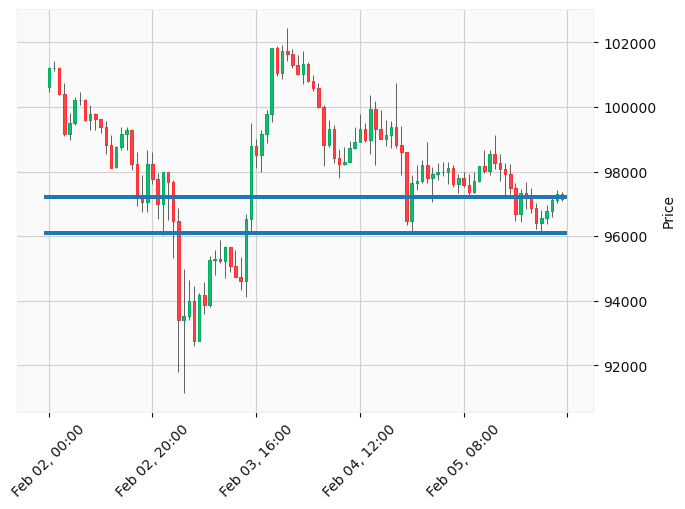

In [142]:
mpf.plot(b, type="candle", style="yahoo", hlines=[sesudah,sebelum])

In [113]:
supports = b[b.low == b.low.rolling(10, center=True).min()].low
resistances = b[b.high == b.high.rolling(10, center=True).max()].high

In [114]:
levels = pd.concat([supports, resistances])

In [115]:
levels = levels[abs(levels.diff())>100]

In [116]:
levels.tolist()

[94111.0,
 97792.8,
 98215.7,
 96100.0,
 97206.0,
 96106.1,
 95891.9,
 102456.0,
 100371.0,
 100743.6,
 99124.2]

In [140]:
#a = [1, 3, 4, 6, 8]

# Cari angka terdekat sebelum dan sesudahnya angka 5
sebelum = max([x for x in levels.tolist() if x < 96106.1])
sesudah = min([x for x in levels.tolist() if x > 96106.1])

# Gabungkan hasil
hasil = [sebelum, sesudah]

print(hasil)

[96100.0, 97206.0]


In [146]:
import matplotlib.pyplot as plt

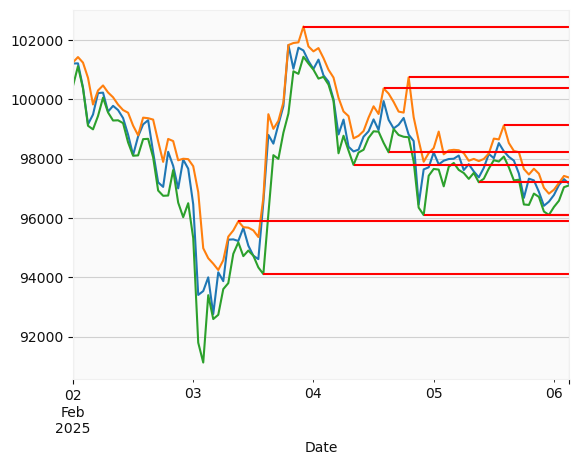

In [148]:
b.close.plot()
b.high.plot()
b.low.plot()
plt.hlines(levels, xmin=levels.index, xmax=b.index[-1], color="red")